<h1 align=center>Convertendo texto em recursos</h1>
<p align=center><img src=https://eu-images.contentstack.com/v3/assets/blt66983808af36a8ef/bltbaa3d257588c7d0c/60e2ea5675106a304cacdaf9/NLP-iQoncept-stock.jpg?quality=80&format=jpg&width=690 width=500></p>


Este capítulo abrange métodos de engenharia de recursos básicos a avançados (texto para recursos). No final do capítulo, você estará confortável com as seguintes receitas.
* Receita 1. Codificação one-hot
* Receita 2. Vetorizador de contagem
* Receita 3. n-grama
* Receita 4. Matriz de co-ocorrência
* Receita 5. Vetorização de hash
* Receita 6. Frequência de documento inversa de frequência de termo (TF-IDF)
* Receita 7. Incorporação de palavras
* Receita 8. Implementando fastText
* Receita 9. Convertendo texto em recursos usando incorporações de última geração

Agora que todas as etapas de pré-processamento de texto foram discutidas, vamos explorar a engenharia de recursos, a base para a linguagem natural em processamento. Como você sabe, máquinas ou algoritmos não podem entender caracteres, palavras ou frases. Eles só podem receber números como entrada, o que inclui binários. Mas a natureza inerente dos dados textuais é desestruturada e barulhenta, o que impossibilita a interação com máquinas.

O procedimento de conversão de texto bruto em um formato compreensível por máquina (números) é chamado de **feature engineering** (engenharia de recursos). O desempenho e a precisão dos algoritmos de aprendizado de máquina e aprendizado profundo dependem fundamentalmente da técnica de engenharia de recursos.

Este capítulo discute diferentes métodos e técnicas de engenharia de recursos; suas funcionalidades, vantagens e desvantagens; e exemplos para ajudá-lo a perceber a importância da engenharia de recursos.

## Receita 3-1. Conversão de texto em recursos usando a codificação One-Hot
A codificação one-hot é o método tradicional usado na engenharia de recursos. Qualquer pessoa que conheça o básico do aprendizado de máquina já se deparou com a codificação one-hot. É o processo de converter variáveis categóricas em recursos ou colunas e codificar um ou zero para essa categoria específica. A mesma lógica é usada aqui, e o número de características é o número total de tokens presentes no corpus.
### Problema
Você deseja converter texto em um recurso usando a codificação one-hot.
### Solução
A codificação One-hot converte caracteres ou palavras em números binários, conforme mostrado a seguir.
<p align=center><img src=https://www.nomidl.com/wp-content/uploads/2022/06/image-57.png></p>

## Como funciona
Existem muitas funções para gerar recursos de codificação one-hot. Vamos pegar uma função e discuti-la em profundidade.
#### Etapa 1-1. Armazenar o texto em uma variável
O código seguinte mostra uma única linha.

In [1]:
text = 'I am learning NLP'

#### Etapa 1-2. Executar uma função nos dados de texto
A seguir está uma função da biblioteca pandas para converter texto em um recurso.

In [2]:
import pandas as pd

# Gerando as features

pd.get_dummies(text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


A saída possui quatro características, pois o número de palavras distintas presentes na entrada foi 4.

## Receita 3-2. Convertendo texto em recursos usando um vetorizador de contagem
A abordagem usada na Receita 3-1 tem uma desvantagem. Não considera a frequência de uma palavra. Se uma determinada palavra aparecer várias vezes, há uma chance de perder informações se ela não for incluída na análise. Um vetorizador de contagem resolve esse problema. Esta receita abrange outro método para converter texto em um recurso: o vetorizador de contagem.
### Problema
Como você converte texto em um recurso usando um vetorizador de contagem?
### Solução
Um vetorizador de contagem é semelhante à codificação one-hot, mas em vez de verificar se uma determinada palavra está presente ou não, ele conta as palavras que estão presentes no documento. No exemplo a seguir, as palavras I e NLP ocorrem duas vezes no primeiro documento.
<p><img src=https://cdn-images-1.medium.com/max/1500/1*DyxhGULG7bwuvQtR1yRB0g.png width=700></p>

### Como funciona
O sklearn possui uma função de extração de recursos que extrai recursos do texto. Vejamos como executar isso. O seguinte importa a função CountVectorizer de sklearn.

In [2]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


O quinto token, nlp, aparece duas vezes no documento.

## Receita 3-3. Gerando n-grams
Nos métodos anteriores, cada palavra era considerada uma característica. Há uma desvantagem nesse método. Não considera as palavras anteriores e as palavras seguintes para ver se daria um significado adequado e completo. Por exemplo, considere a frase "not bad" (nada mal). Se for dividido em palavras individuais, perde em transmitir a mensagem do bem, que é o que essa frase significa.

Como você viu, você pode perder informações ou insights em potencial porque muitas palavras fazem sentido quando são colocadas juntas. Os *n-grams* podem resolver este problema.

Os *n-grams* são a fusão de várias letras ou várias palavras. Eles são formados de tal maneira que até as palavras anteriores e seguintes são capturadas.
* **Unigramas** são as palavras únicas presentes em uma frase.
* Um **bigrama** é a combinação de duas palavras.
* Um **trigrama** é a combinação de três palavras. E assim por diante.

Por exemplo, veja a frase “I am learning NLP”.
* Unigramas: “I”, “am”, “learning”, “NLP”
* Bigramas: “I am”, “am learning”, “learning NLP”
* Trigramas: “I am learning”, “am learning NLP”

### Problema
Gere os n-gramas para uma determinada frase.
### Solução
Existem muitos pacotes que geram n-grams.TextBlob é o mais comumente usado.
### Como funciona
Siga as etapas desta seção.
#### Etapa 3-1. Gerar n-gramas usando TextBlob
Vamos ver como gerar n-gramas usando TextBlob.

In [2]:
Text = "I am learning NLP"

Use a seguinte função TextBlob para criar n-grams. Use o texto definido e indique o n com base no requisito.

In [7]:
from textblob import TextBlob

# N-gram = 1
print("N-Gram = 1:", TextBlob(text=Text).ngrams(1))

# N-gram = 2
print("N-Gram = 2:", TextBlob(text=Text).ngrams(2))

# N-gram = 3
print("N-Gram = 3:", TextBlob(text=Text).ngrams(3))

N-Gram = 1: [WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]
N-Gram = 2: [WordList(['I', 'am']), WordList(['am', 'learning']), WordList(['learning', 'NLP'])]
N-Gram = 3: [WordList(['I', 'am', 'learning']), WordList(['am', 'learning', 'NLP'])]


#### Etapa 3-2. Gerar recursos baseados em bigrama para um documento
Assim como na receita anterior, um vetorizador de contagem para gerar feições. Usando a mesma função, vamos gerar recursos de bigrama para ver como é a saída.

In [14]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


A saída possui recursos com bigramas; no exemplo, a contagem é 1 para todos os tokens. Você também pode usar trigramas.

## Receita 3-4. Gerando uma Matriz de Coocorrência
Vamos discutir um método de engenharia de recursos chamado matriz de coocorrência.
### Problema
Você deseja entender e gerar uma matriz de co-ocorrência.
### Solução
Uma matriz de coocorrência é como um vetorizador de contagem; conta a ocorrência de um grupo de palavras em vez de palavras individuais.
### Como funciona
Vamos ver como gerar esse tipo de matriz usando NLTK, bigramas e algumas habilidades básicas de codificação Python.
#### Etapa 4-1. Importe as bibliotecas necessárias
Aqui está o código.

In [18]:
import numpy as np
import pandas as pd
import nltk
from nltk import bigrams
import itertools

#### Etapa 4-2. Criar função para uma matriz de co-ocorrência
A seguir está a função matriz de co-ocorrência.

In [52]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word: co_occurrence_matrix[current][previous]
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

#### Etapa 4-3. Gerar uma matriz de coocorrência
Aqui estão as frases para teste.

In [53]:
sentences = [['I', 'love', 'nlp'],
            ['I', 'love','to' 'learn'],
            ['nlp', 'is', 'future'],
            ['nlp', 'is', 'cool']]

In [55]:
# Cria uma única lista com muitas listas
merged = list(itertools.chain.from_iterable(sentences))
# Desempacota a variável vocab_to_index e matrix
matrix, vocab_to_index = co_occurrence_matrix(merged)

# gera a matrix
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

         love    I  future  tolearn   is  nlp  cool
love      0.0  2.0     0.0      0.0  0.0  0.0   0.0
I         0.0  0.0     0.0      0.0  0.0  1.0   0.0
future    0.0  0.0     0.0      0.0  1.0  0.0   0.0
tolearn   1.0  0.0     0.0      0.0  0.0  0.0   0.0
is        0.0  0.0     0.0      0.0  0.0  2.0   0.0
nlp       1.0  0.0     1.0      1.0  0.0  0.0   0.0
cool      0.0  0.0     0.0      0.0  1.0  0.0   0.0


*I, love*, 3 *is, nlp* apareceram juntas duas vezes, e algumas outras palavras apareceram apenas uma vez.

## Receita 3-5. Vetorização de hash
Um vetorizador de contagem e uma matriz de coocorrência têm uma limitação: o vocabulário pode se tornar muito grande e causar problemas de memória/computação. Um vetorizador de hash é uma maneira de resolver esse problema.
### Problema
Você deseja entender e gerar um vetorizador de hash.
### Solução
Um vetorizador de hash é eficiente em termos de memória e, em vez de armazenar tokens como strings, o vetorizador aplica o truque de hash para codificá-los como índices numéricos. A desvantagem é que é unidirecional e, uma vez vetorizado, os recursos não podem ser recuperados.
### Como funciona
Vejamos um exemplo usando sklearn.
#### Etapa 5-1. Importe as bibliotecas necessárias e crie um documento

In [61]:
from sklearn.feature_extraction.text import HashingVectorizer

text = ['Eu gosto de estudar NLP e faço isso sempre pela manhã.']

#### Etapa 5-2. Gerar uma matriz de vetorizador de hash
Vamos criar uma matriz de vetorização de hash (HashingVectorizer) com um tamanho de vetor de 10.

In [69]:
# transform
vectorizer = HashingVectorizer(n_features=10)
# create the hashing vector
vector = vectorizer.transform(text)

# summarize the vector
print(vector.shape)
print(vector.toarray())

(1, 10)
[[ 0.          0.         -0.63245553 -0.31622777  0.          0.31622777
   0.31622777  0.31622777  0.31622777 -0.31622777]]


Ele criou um vetor de tamanho 10, e agora pode ser usado para qualquer tarefa supervisionada/não supervisionada.

## Receita 3-6. Convertendo texto em recursos usando TF-IDF
Os métodos **text-to-feature** mencionados acima têm algumas desvantagens, daí a introdução do TF-IDF. A seguir estão algumas das desvantagens.
* Digamos que uma determinada palavra apareça em todos os documentos do corpus. Ele alcança maior importância em nossos métodos anteriores, mas isso pode não ser relevante para o seu caso.
* O TF-IDF reflete sobre a importância de uma palavra para um documento em uma coleção e, portanto, normaliza palavras que aparecem com frequência em todos os documentos.

### Problema
Você deseja converter texto em recursos usando TF-IDF.

###Solução
A **frequência do termo (TF)** é a razão entre a contagem de uma determinada palavra presente em uma frase e a contagem total de palavras na mesma frase. O TF captura a importância da palavra independentemente do tamanho do documento. Por exemplo, uma palavra com frequência 3 em uma frase com 10 palavras é diferente de quando o comprimento da frase é de 100 palavras. Deveria ter mais importância no primeiro cenário, que é o que o TF faz. **TF(t)** = (Número de vezes que o termo t aparece em um documento) / (Número total de termos no documento).

**A frequência inversa de documentos (IDF)** é um logaritmo da razão entre o número total de linhas e o número de linhas em um documento específico no qual uma palavra está presente. IDF = log(N/n), onde N é o número total de linhas e n é o número de linhas em que a palavra estava presente.

IDF mede a raridade de um termo. Palavras como **a** e **the** aparecem em todos os documentos do corpus, mas palavras raras não estão em todos os documentos. Assim, se uma palavra aparece em quase todos os documentos, essa palavra não serve para nada, pois não ajuda na classificação ou na recuperação da informação. IDF anula este problema.

O TF-IDF é o produto simples do TF e do IDF que aborda ambas as desvantagens, tornando as previsões e a recuperação de informações relevantes.
~~~python
TF-IDF = TF * IDF
~~~
### Como funciona
Siga as etapas desta seção.
#### Etapa 6-1. Leia os dados de texto
A seguir, uma frase familiar.

In [80]:
text = ['A juventude é bela.', 'A vida é bela.', 'Eu sou a juventude e sou bela']

#### Etapa 6-2. Crie os recursos
Execute o seguinte código nos dados de texto.

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Tokenizer e construir o vocabulário
vectorizer.fit(text)

TfidfVectorizer()

In [82]:
# Resumo
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'juventude': 2, 'bela': 0, 'vida': 4, 'eu': 1, 'sou': 3}
[1.         1.69314718 1.28768207 1.69314718 1.69314718]


Observe que o aparece nos três documentos, portanto não agrega muito valor. O valor do vetor é 1, que é menor que todos os outros tokens. Todos os métodos ou técnicas que você viu até agora são baseados na frequência. Eles são chamados de incorporações ou recursos baseados em frequência. A próxima receita analisa os embeddings baseados em previsão, normalmente chamados de embeddings de palavras.

## Receita 3-7. Implementando Word Embeddings
Esta receita pressupõe que você tenha um conhecimento prático de como uma rede neural funciona e os mecanismos pelos quais os pesos na rede neural são atualizados. Mesmo que todos os métodos anteriores resolvam a maioria dos problemas, quando você entra em problemas mais complexos onde deseja capturar a relação semântica entre palavras (contexto), esses métodos não funcionam. O seguinte explica os desafios com os métodos discutidos até agora.
* As técnicas falham em capturar o contexto e o significado das palavras. Eles dependem da aparência ou frequência das palavras. Você precisa saber como capturar o contexto ou as relações semânticas.
    * I am eating an *apple*
    * I am using an *Apple*.

No exemplo, *apple* tem significados diferentes quando é usada com palavras adjacentes diferentes (próximas) comendo e usando.
* Para um problema como classificação de documentos (classificação de livros na biblioteca), um documento é enorme e muitos tokens são gerados. Nesses cenários, seu número de recursos pode ficar fora de controle (onde), prejudicando a precisão e o desempenho.

Uma máquina/algoritmo pode combinar dois documentos/textos e dizer se eles são iguais ou não. Como fazemos as máquinas falarem sobre *criket* ou *Virat Kohli* quando você procura por *MS Dhoni*? Como você faz a máquina entender que a palavra *apple* em “*An apple is a tasty fruit*” é uma fruta que pode ser comida e não uma companhia?

A resposta a essas perguntas está na criação de uma representação para palavras que capturem seus significados, relações semânticas e os diferentes tipos de contextos em que são usadas.

Incorporações de palavras abordam esses desafios. A incorporação de palavras é uma técnica de aprendizado de recursos na qual o vocabulário é mapeado para vetores de números reais, capturando a hierarquia contextual.

Na tabela a seguir, cada palavra é representada por quatro números, chamados de vetores. Usando a técnica de incorporação de palavras, derivamos esses vetores para cada palavra para usá-los em futuras análises e aplicações de construção. No exemplo, a dimensão é quatro, mas você normalmente usa uma dimensão maior que 100.

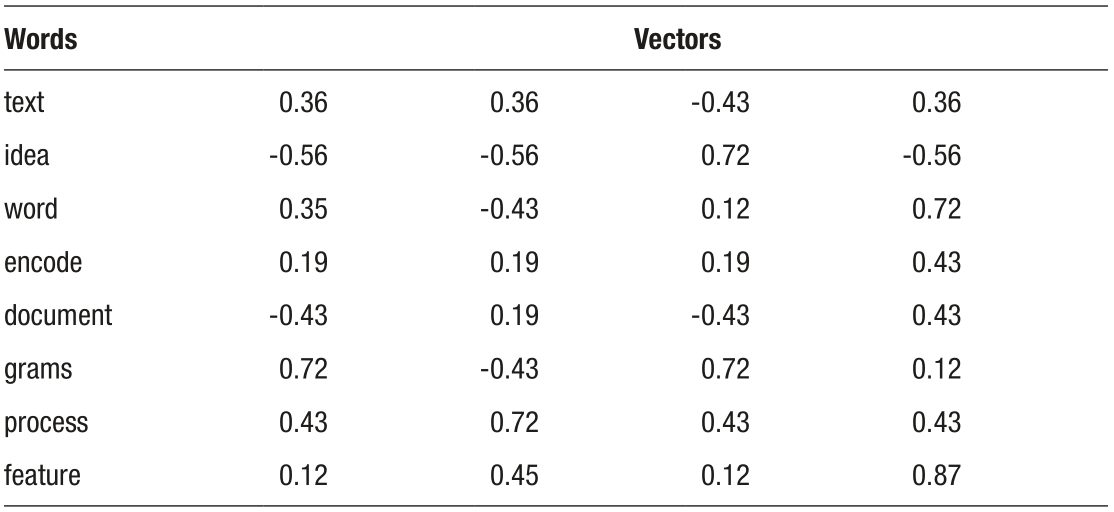

In [83]:
from IPython.display import Image
Image('images/word_vectors.PNG')